<a href="https://colab.research.google.com/github/ugosamartins-commits/Sorbonne-M1-Analyse-Donnees-Portfolio-Ugo-Martins/blob/main/Seance_04_mon_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== DÉBUT DE L'ANALYSE DES DISTRIBUTIONS ===

--- Loi de Dirac ---
Moyenne (Espérance) : 5.0000
Écart-type          : 0.0000
------------------------------


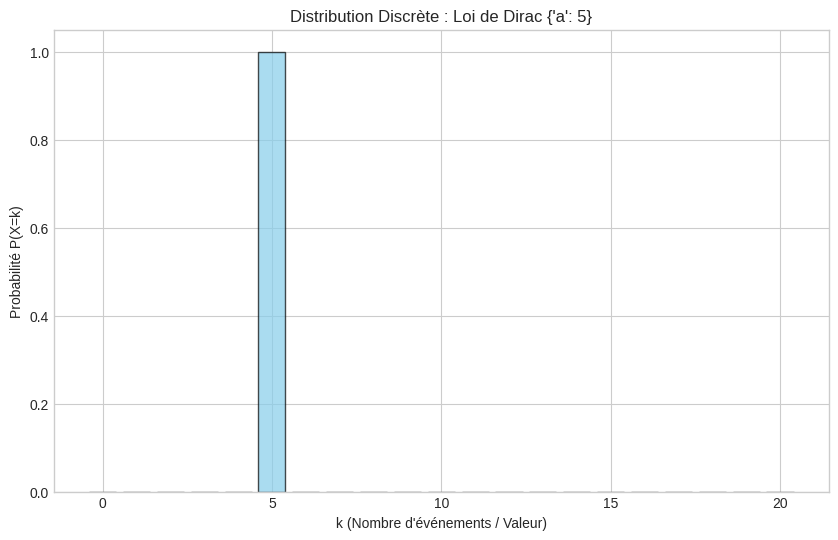

--- Loi Uniforme Discrète (Dé) ---
Moyenne (Espérance) : 3.5000
Écart-type          : 1.7078
------------------------------


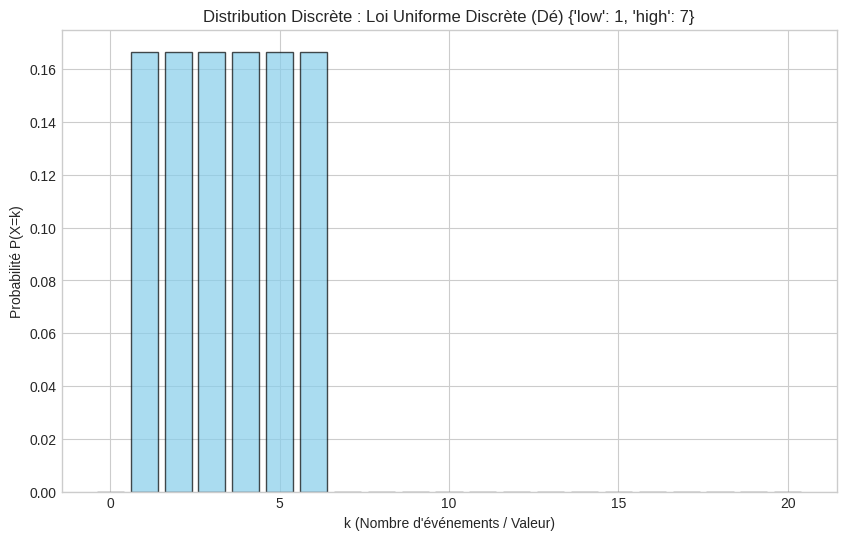

--- Loi Binomiale ---
Moyenne (Espérance) : 5.0000
Écart-type          : 1.5811
------------------------------


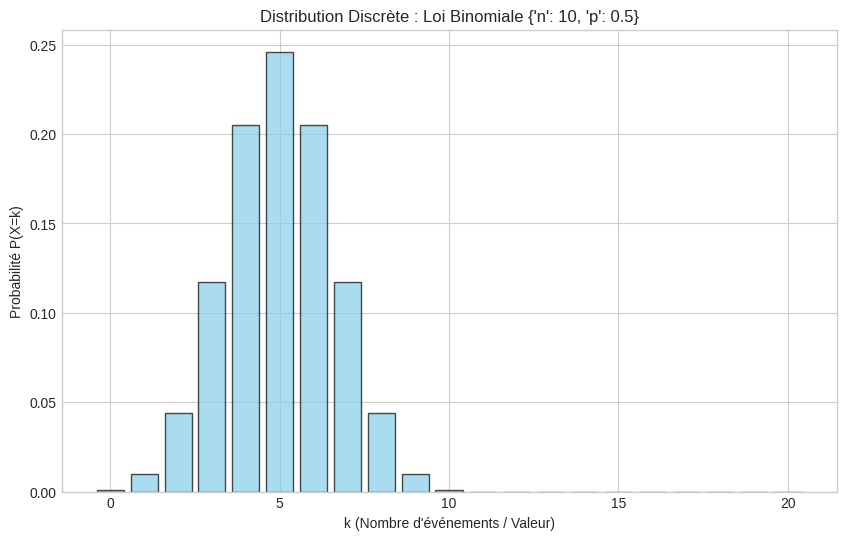

--- Loi de Poisson ---
Moyenne (Espérance) : 3.0000
Écart-type          : 1.7321
------------------------------


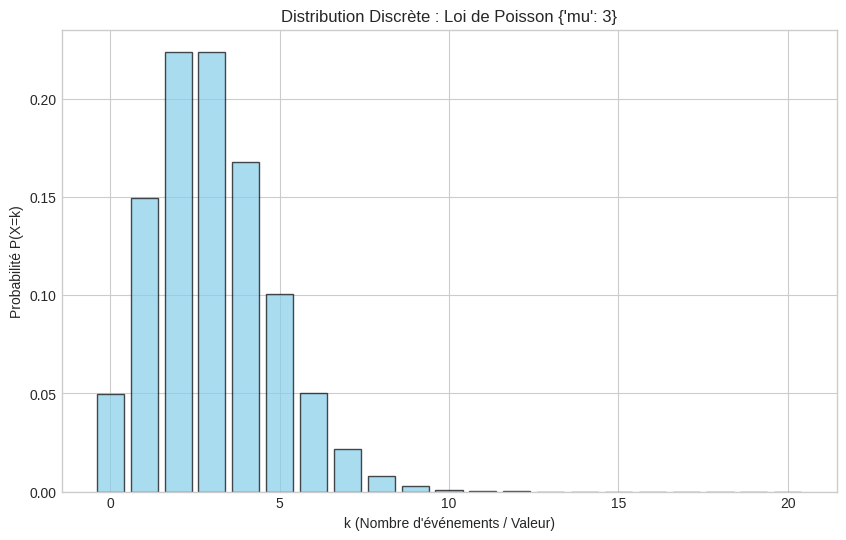

--- Loi de Zipf ---
Moyenne (Espérance) : inf
Écart-type          : inf
------------------------------


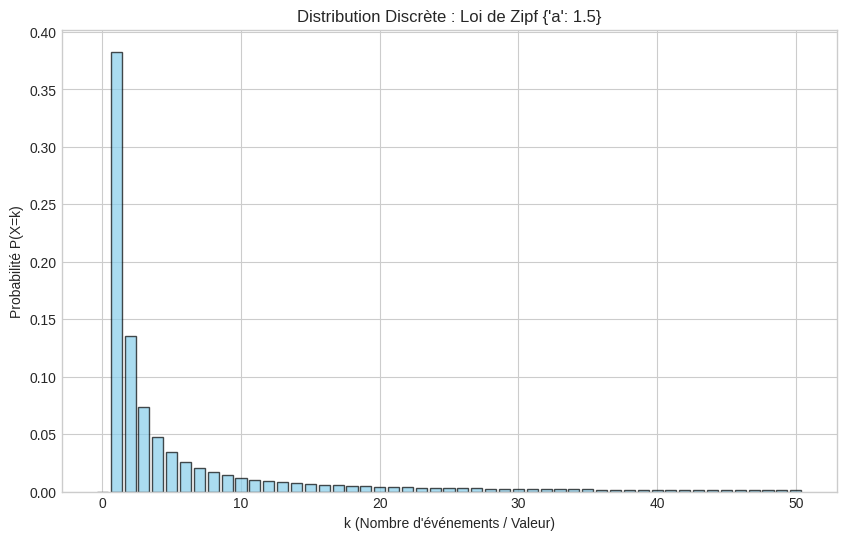

--- Loi Normale Centrée Réduite ---
Moyenne (Espérance) : 0.0000
Écart-type          : 1.0000
------------------------------


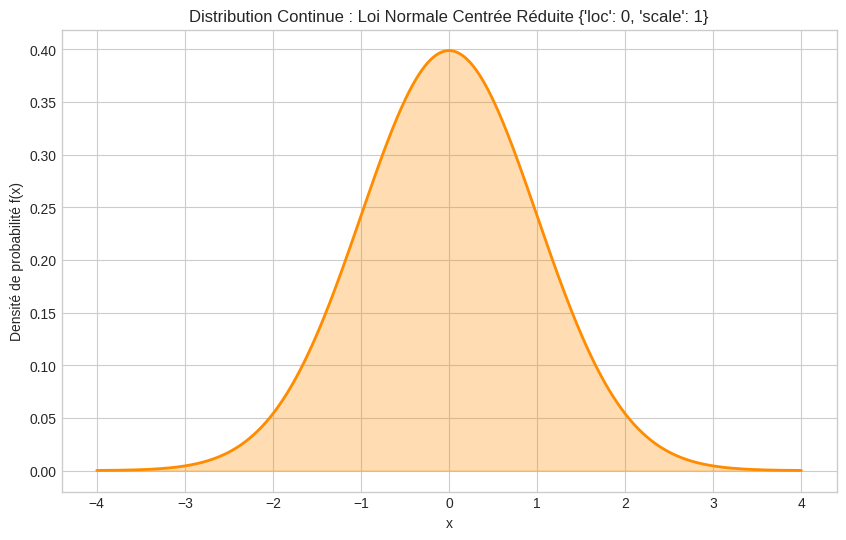

--- Loi Log-Normale ---
Moyenne (Espérance) : 1.4993
Écart-type          : 1.6749
------------------------------


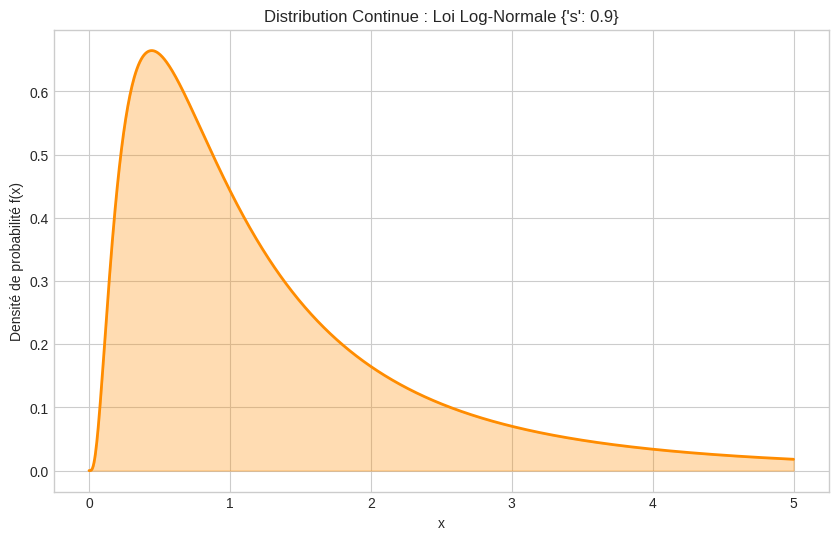

--- Loi Uniforme Continue ---
Moyenne (Espérance) : 5.0000
Écart-type          : 2.8868
------------------------------


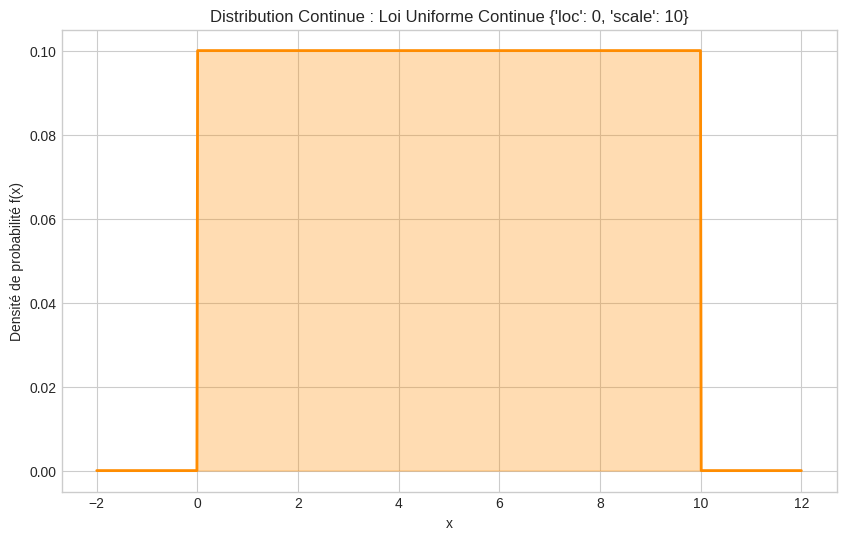

--- Loi du Chi-2 ---
Moyenne (Espérance) : 3.0000
Écart-type          : 2.4495
------------------------------


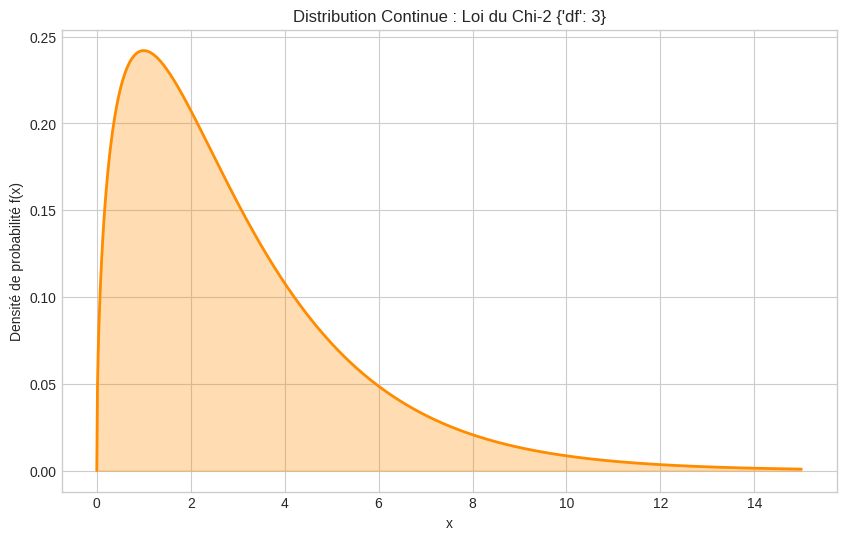

--- Loi de Pareto ---
Moyenne (Espérance) : 1.6173
Écart-type          : 1.2689
------------------------------


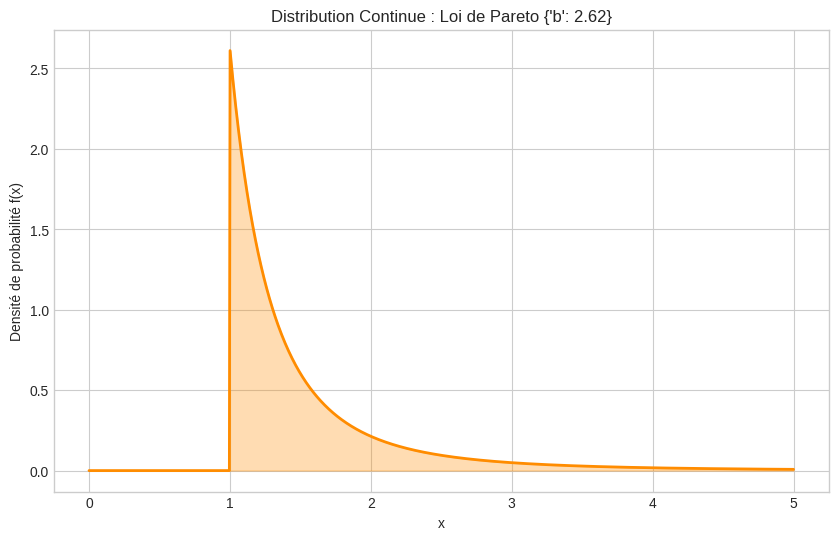

--- Loi Exponentielle (Lien Poisson) ---
Moyenne (Espérance) : 1.0000
Écart-type          : 1.0000
------------------------------


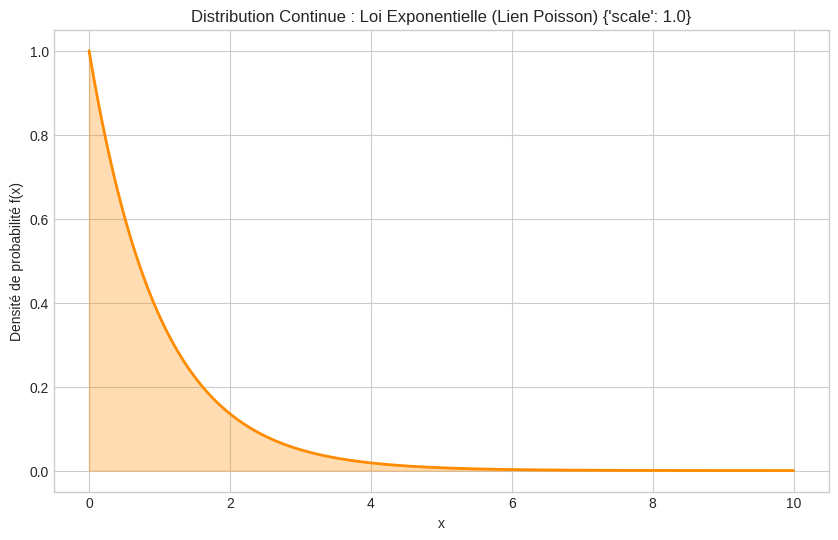


=== FIN DE L'ANALYSE ===


In [ ]:
# --- INSTALLATION & IMPORTS ---
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

# Configuration esthétique des graphiques
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

def afficher_stats(nom_loi, moyenne, ecart_type):
    """Affiche proprement la moyenne et l'écart-type dans la console."""
    print(f"--- {nom_loi} ---")
    print(f"Moyenne (Espérance) : {moyenne:.4f}")
    print(f"Écart-type          : {ecart_type:.4f}")
    print("-" * 30)

# --- 1. FONCTIONS POUR VARIABLES DISCRÈTES ---

def visualiser_loi_discrete(dist, params, nom, x_max=20):
    """
    Visualise une loi discrète (PMF) et affiche ses stats.
    Args:
        dist: L'objet distribution de scipy (ex: stats.poisson)
        params: Dictionnaire des paramètres (ex: {'mu': 4})
        nom: Nom de la loi pour l'affichage
        x_max: Valeur maximale de l'axe X pour l'affichage
    """
    # Création des données
    x = np.arange(0, x_max + 1)

    # Cas particulier pour Dirac (simulation manuelle car pas dans scipy)
    if nom == "Loi de Dirac":
        a = params['a']
        pmf = np.zeros_like(x, dtype=float)
        if 0 <= a <= x_max:
            pmf[a] = 1.0
        moyenne = a
        ecart_type = 0
    else:
        # Calcul via Scipy
        pmf = dist.pmf(x, **params)
        moyenne = dist.mean(**params)
        ecart_type = dist.std(**params)

    # Affichage Statistique (Exercice 2.2)
    afficher_stats(nom, moyenne, ecart_type)

    # Graphique (Exercice 2.1)
    plt.figure()
    plt.bar(x, pmf, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f"Distribution Discrète : {nom} {params}")
    plt.xlabel("k (Nombre d'événements / Valeur)")
    plt.ylabel("Probabilité P(X=k)")
    plt.show()

# --- 2. FONCTIONS POUR VARIABLES CONTINUES ---

def visualiser_loi_continue(dist, params, nom, x_min=-5, x_max=15):
    """
    Visualise une loi continue (PDF) et affiche ses stats.
    """
    # Création des données (lissage de la courbe)
    x = np.linspace(x_min, x_max, 1000)

    # Calcul via Scipy
    pdf = dist.pdf(x, **params)
    moyenne = dist.mean(**params)
    ecart_type = dist.std(**params)

    # Affichage Statistique (Exercice 2.2)
    afficher_stats(nom, moyenne, ecart_type)

    # Graphique (Exercice 2.1)
    plt.figure()
    plt.plot(x, pdf, color='darkorange', linewidth=2)
    plt.fill_between(x, pdf, color='darkorange', alpha=0.3)
    plt.title(f"Distribution Continue : {nom} {params}")
    plt.xlabel("x")
    plt.ylabel("Densité de probabilité f(x)")
    plt.show()

# --- 3. EXÉCUTION DU PROGRAMME PRINCIPAL ---

print("=== DÉBUT DE L'ANALYSE DES DISTRIBUTIONS ===\n")

# --- A. LOIS DISCRÈTES ---
# 1. Loi de Dirac (simulée au point a=5)
visualiser_loi_discrete(None, {'a': 5}, "Loi de Dirac")

# 2. Loi Uniforme Discrète (un dé à 6 faces : de 1 à 6)
# Scipy randint prend [low, high[, donc 1 à 7 pour avoir 1..6
visualiser_loi_discrete(stats.randint, {'low': 1, 'high': 7}, "Loi Uniforme Discrète (Dé)")

# 3. Loi Binomiale (10 tirages, proba succès 0.5)
visualiser_loi_discrete(stats.binom, {'n': 10, 'p': 0.5}, "Loi Binomiale")

# 4. Loi de Poisson (lambda = 3 événements par intervalle)
visualiser_loi_discrete(stats.poisson, {'mu': 3}, "Loi de Poisson")

# 5. Loi de Zipf (paramètre a=1.5)
# Note : Scipy appelle le paramètre de forme 'a'
visualiser_loi_discrete(stats.zipf, {'a': 1.5}, "Loi de Zipf", x_max=50)


# --- B. LOIS CONTINUES ---
# 6. Loi Normale (moyenne 0, écart-type 1)
visualiser_loi_continue(stats.norm, {'loc': 0, 'scale': 1}, "Loi Normale Centrée Réduite", -4, 4)

# 7. Loi Log-Normale (forme s=0.9)
visualiser_loi_continue(stats.lognorm, {'s': 0.9}, "Loi Log-Normale", 0, 5)

# 8. Loi Uniforme Continue (entre 0 et 10)
visualiser_loi_continue(stats.uniform, {'loc': 0, 'scale': 10}, "Loi Uniforme Continue", -2, 12)

# 9. Loi du Chi-2 (k=3 degrés de liberté)
visualiser_loi_continue(stats.chi2, {'df': 3}, "Loi du Chi-2", 0, 15)

# 10. Loi de Pareto (b=2.62)
visualiser_loi_continue(stats.pareto, {'b': 2.62}, "Loi de Pareto", 0, 5)

# Note sur la "Loi de Poisson Continue" demandée dans l'exercice :
# Mathématiquement, la loi continue associée aux processus de Poisson est souvent la loi Exponentielle (temps entre événements).
visualiser_loi_continue(stats.expon, {'scale': 1.0}, "Loi Exponentielle (Lien Poisson)", 0, 10)

print("\n=== FIN DE L'ANALYSE ===")
